#### Project Purpose

The purpose of this project is to perform some basic cleaning tasks prior to using for further analysis.  Later a PCA analysis will attempt to answer the question "What are some characteristics present in customers who will stop their service?"

#### Dataset and Variables

- The data was pulled from [here](https://community.ibm.com/accelerators/catalog/content/Telco-customer-churn) and a description of the variables can be found [here](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)
- The variables in the Telco dataset are as follows:

- The Customer_id column is a string data type and is the unique identifier assigned to the customer.
- Count is a numeric value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- Country is a string variable noting the country of the customer’s primary residence.
- Country, State, and City for the specific customer location based on billing statement are string variables.
- Lat Long is the string variable combination of the Latitude and Longitude of the customer's residence.
- Latitude and Longitude are the latitude and longitude of the customer's residence and are integer variables.
- Gender describes whether the customer identifies as male or female, and is a string categorical variable.
- Senior Citizen is a numeric binary variable with a value of 0 if the customer is not a senior citizen and 1 if they are.
- Partner is a yes or no categorical string variable answering the question of whether the customer has a partner or not.
- Dependents is a yes or no categorical string variable answering the question of whether the customer lives with any dependents. Dependents could be children, parents, grandparents, etc.
- Tenure Months is an integer variable for the number of months that the customer has been with the provider.	
- Phone Service	is a yes or no categorical string object answering the question of whether the customer has a phone service.
- Multiple Lines is a yes or no categorical string object answering the question of whether the customer has multiple phone lines.
- Internet service is the type of internet service provided to the customer (Fiber optic/DSL/No) and is a categorical string object.
- Online Security is a yes or no categorical string object answering the question of whether the customer has an internet security add-on.	
- Online Backup is a yes or no categorical string object answering the question of whether the customer has an online backup add-on.
- Device Protection is a yes or no categorical string object answering the question of whether the customer has a device protection add-on.
- Tech Support is a yes or no categorical string object answering the question of whether the customer has a technical support add-on.	
- Streaming TV is a yes or no categorical string object answering the question of whether the customer has a streaming TV add-on.
- Streaming Movies is a yes or no categorical string object answering the question of whether the customer has a streaming movie add-on.	
- Contract is a categorical string variable for the length of the customer's current contract (month-to-month/one year/two year).
- Paperless Billing is a yes or no categorical string object answering the question of whether the customer participates in paperless billing.
- Payment Method is the type of payment used by the customer (credit card/mailed check/bank transfer/electronic check) and is a categorical string variable.
- Monthly Charge is a numeric variable indicating the customer’s current total monthly charge for all their services from the company.
- Total Charges is a string variable indicating the customer’s total charges, calculated to the end of the quarter specified above.
- Churn Label is a yes or no categorical answer to whether the customer has terminated services in the last quarter.
- Churn Value is a numeric binary value with: 1 = the customer left the company this quarter and 0 = the customer remained with the company. Directly related to Churn Label.
- Churn Score is a numeric variable which is a value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- CLTV(or Customer Lifetime Value) is an integer variable that is a prediction that is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- Churn Reason is a string variable which specifies a customer’s specific reason for leaving the company. 

In [1]:
# Import initial libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in CSV data file 
# Note: After looking at datatypes, reloaded data to properly cast the zip code to a string type
pd.options.display.max_columns = None
df = pd.read_csv('Telco_customer_churn.csv', dtype={'Zip Code': 'str'}) 
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
# View info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   object 
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#### C1. PLAN TO FIND ANOMALIES
- I will ensure that all datatypes are appropriate for the variable.
- I will begin by looking for outliers which may be problematic in data analysis.  I will first look at the mean versus the median in the quantitative variables.  Variables in which the two values are significantly different will be looked at further using boxplots which will identify outliers.
- Next, I will look for any columns with missing data.  First, I will look at columns with null or "NaN" values using the python ".isnull()" function, then summing those values by variable.  I will then look for any data with a value of zero using the ".isin()" function with the parameter of zero, then again summing those values for each column.
- Next, I will look for any duplicates that could cause problems.  First I will look for any complete rows in the data set that are duplicated using the ".duplicated()" function.  I will then ensure that no customer ID values are duplicated by again calling the ".duplicated()" function with the parameter subset equal to the Customer_id column.
- Finally, I will investigate the categorical variables to determine if the values are appropriate.  I will do this by displaying bar plots for each variable and viewing the value labels. 

##### - Investigate data types

In [4]:
# View datatypes
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code              object
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

- The "Total Charges" data type is currently string, so should be changed to float prior to investigating outliers

In [5]:
# Convert "Total Charges" column to float and coerce any errors to NaN, then view data type
df['Total Charges'] = pd.to_numeric(df['Total Charges'], downcast='float', errors='coerce')
df['Total Charges'].dtypes

dtype('float32')

##### - Investigate outliers

In [6]:
# View descriptive statistics of numerical data to compare mean vs median (50%)
df.describe()

,Count,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,36.282441,-119.798880,32.371149,64.761692,2283.299561,0.265370,58.699418,4400.295755
std,0.0,2.455723,2.157889,24.559481,30.090047,2266.770264,0.441561,21.525131,1183.057152
min,1.0,32.555828,-124.301372,0.000000,18.250000,18.799999,0.000000,5.000000,2003.000000
25%,1.0,34.030915,-121.815412,9.000000,35.500000,401.450012,0.000000,40.000000,3469.000000
50%,1.0,36.391777,-119.730885,29.000000,70.350000,1397.475098,0.000000,61.000000,4527.000000
75%,1.0,38.224869,-118.043237,55.000000,89.850000,3794.737549,1.000000,75.000000,5380.500000
max,1.0,41.962127,-114.192901,72.000000,118.750000,8684.799805,1.000000,100.000000,6500.000000


- The Tenure Months, Monthly Charges, Total Charges, Churn Score, and CLTV columns have a large enough difference between mean and median to investigate further.

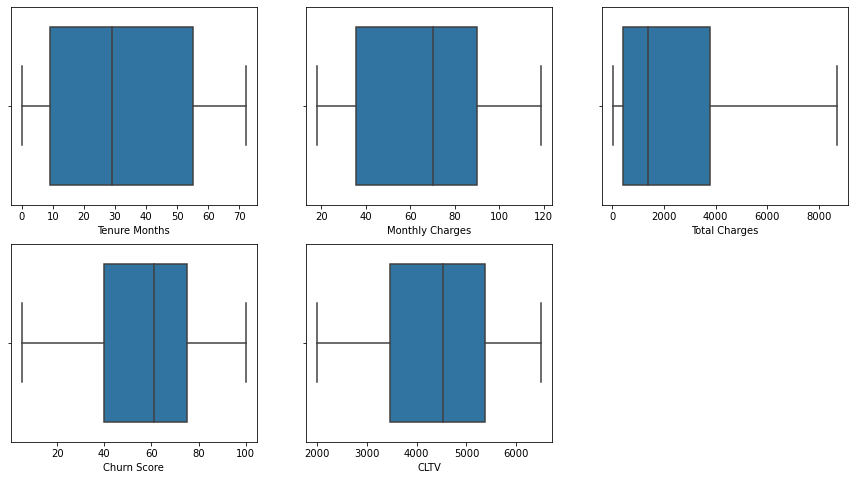

In [7]:
# Display box plots of variables suspected of having outliers
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
plt.subplot(2, 3, 1) 
sns.boxplot(x=df['Tenure Months']) # (ref 3)
plt.subplot(2, 3, 2) 
sns.boxplot(x=df['Monthly Charges'])
plt.subplot(2, 3, 3) 
sns.boxplot(x=df['Total Charges'])
plt.subplot(2, 3, 4) 
sns.boxplot(x=df['Churn Score'])
plt.subplot(2, 3, 5) 
sns.boxplot(x=df['CLTV'])
plt.subplot(2, 3, 6).axis('off')
plt.show();

- There do not appear to be any outliers, however the Total Charges column is skewed to the right.

##### - Investigate missing data

In [8]:
# Calculate the null values in each column
df.isnull().sum() 

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

- Columns with null values include: Total Charges and Churn Reason

In [9]:
# Calculate values of zero for each column
df.isin([0]).sum() 

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months          11
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value          5174
Churn Score             0
CLTV                    0
Churn Reason            0
dtype: int64

- Columns with values of 0 include: Tenure Months and Churn Value

##### - Investigate duplicate data

In [10]:
# Display duplicate rows
df[df.duplicated()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


- There are no duplicate rows.

In [11]:
# Display rows with duplicate CustomerID
df[df.duplicated(subset = 'CustomerID')]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


- There are no duplicate customer IDs.

##### - Investigate at values for categorical variables

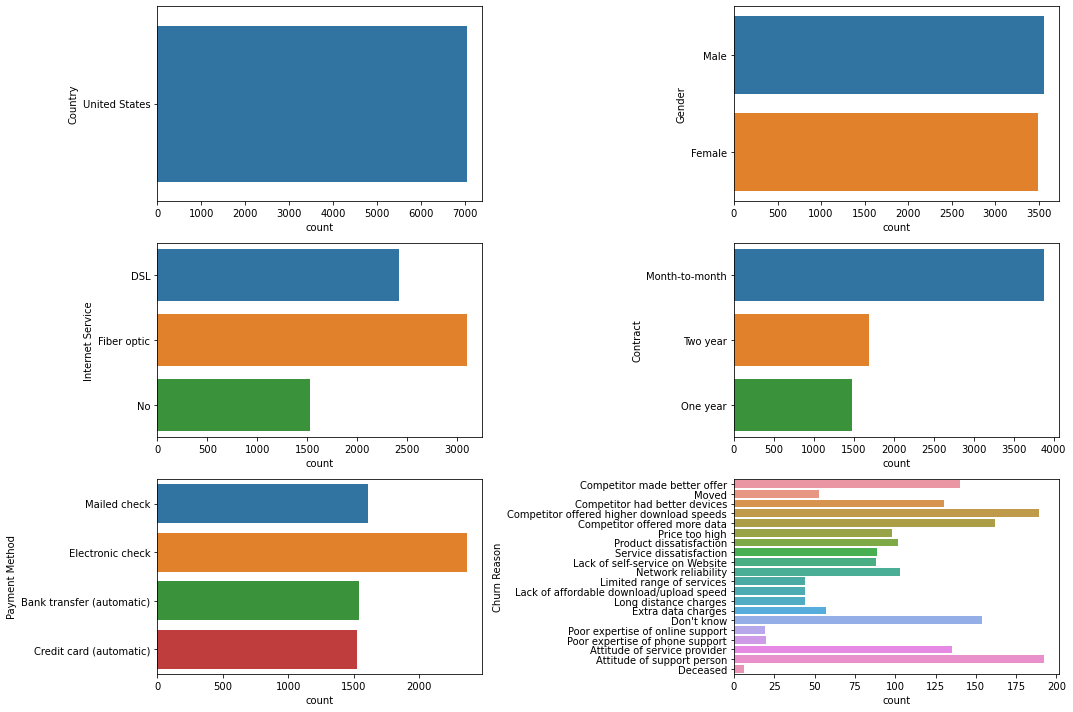

In [12]:
# Display bar plots for string categorical variables
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
plt.subplot(3, 2, 1)
sns.countplot(data = df, y = 'Country') # (ref 3)
plt.subplot(3, 2, 2) 
sns.countplot(data = df, y = 'Gender') 
plt.subplot(3, 2, 3) 
sns.countplot(data = df, y = 'Internet Service')
plt.subplot(3, 2, 4) 
sns.countplot(data = df, y = 'Contract')
plt.subplot(3, 2, 5) 
sns.countplot(data = df, y = 'Payment Method')
plt.subplot(3, 2, 6)
sns.countplot(data = df, y = 'Churn Reason')
figure.tight_layout()
plt.show();

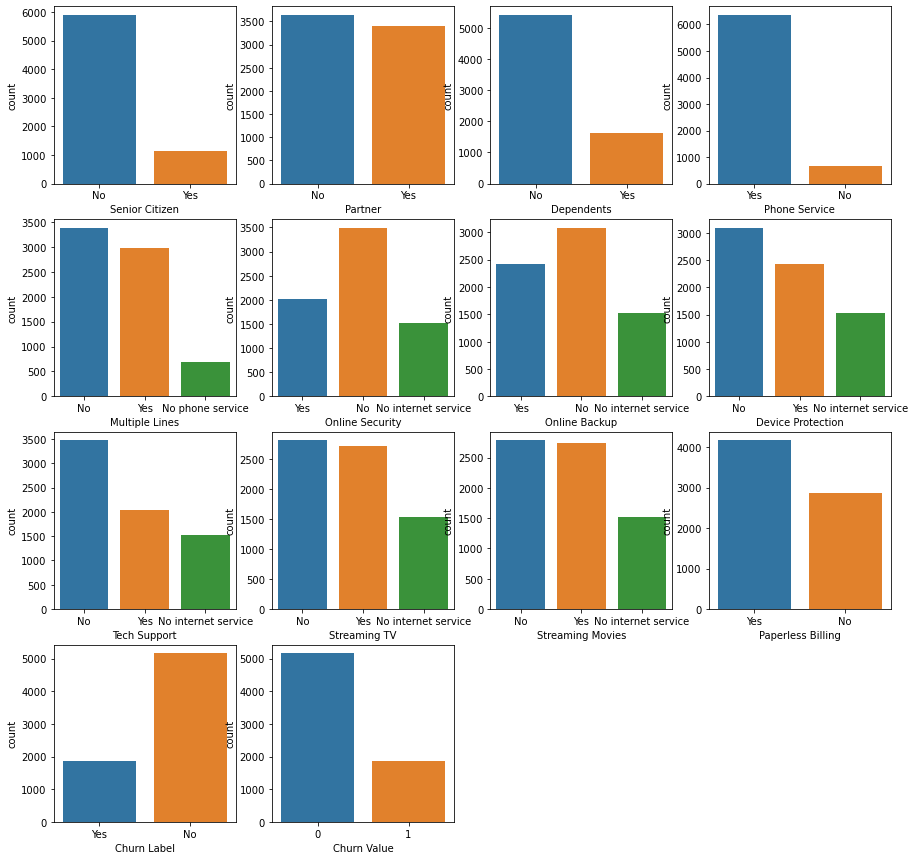

In [13]:
# Display bar plots for yes/no categorical variables
figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15)) # (ref 2)
plt.subplot(4, 4, 1) # (ref 3)
sns.countplot(data = df, x = 'Senior Citizen') 
plt.subplot(4, 4, 2) 
sns.countplot(data = df, x = 'Partner')
plt.subplot(4, 4, 3) 
sns.countplot(data = df, x = 'Dependents')
plt.subplot(4, 4, 4) 
sns.countplot(data = df, x = 'Phone Service')
plt.subplot(4, 4, 5) 
sns.countplot(data = df, x = 'Multiple Lines')
plt.subplot(4, 4, 6) 
sns.countplot(data = df, x = 'Online Security')
plt.subplot(4, 4, 7) 
sns.countplot(data = df, x = 'Online Backup') 
plt.subplot(4, 4, 8) 
sns.countplot(data = df, x = 'Device Protection')
plt.subplot(4, 4, 9) 
sns.countplot(data = df, x = 'Tech Support')
plt.subplot(4, 4, 10) 
sns.countplot(data = df, x = 'Streaming TV')
plt.subplot(4, 4, 11) 
sns.countplot(data = df, x = 'Streaming Movies')
plt.subplot(4, 4, 12) 
sns.countplot(data = df, x = 'Paperless Billing')
plt.subplot(4, 4, 13) 
sns.countplot(data = df, x = 'Churn Label')
plt.subplot(4, 4, 14)
sns.countplot(data = df, x = 'Churn Value')
plt.subplot(4, 4, 15).set_visible(False)
plt.subplot(4, 4, 16).set_visible(False) 
plt.show();

- There do not appear to be any inappropriate values in the categorical variables.  Several variables were misclassified as binary that are actually categorical.

#### Exploratory Findings

- The Total Charges column is right skewed and should be normalized by calculating the z-score.

- The Total Charges and Churn Reason columns have null values, while the Tenure Months and Churn Value columns have zero values. 

- There are no duplicate rows of data or duplicate customer Ids.

- The values of all categorical data appear to be appropriate for each variable.  

#### Items and Reasoning for Cleaning

<p>Certain algorithms perform better when data is standardized by calculating the z-score (Larose, 2019). Therefore, I will calculate the z-score of the Total Charges column using the scipy.stats "zscore()" function.  Then I will look at the histogram to see how many standard deviations that values lie from the mean. </p>

<p>Finally, there are numerical variables that I believe it makes to replace the null with the mean value of the column (Total Charges, Tenure Months, and Churn Value).  Using the mean value will not affect the overall mean of the column, and allows the data in the rest of the row to remain available for future analysis.   The Churn Reason column nulls should be considered if it is used in future analysis, but I do not think it is necessary to impute the values as they are categorical. </p> 

##### - Calculate z-scores

In [15]:
# Import scipy.stats
import scipy.stats as stats

# Calculate z-score for Total Charges and view head
df_clean = df
df_clean['zscore_Total_Charges'] = stats.zscore(df['Total Charges'], nan_policy='omit') # (ref 1)
df_clean[['Total Charges', 'zscore_Total_Charges']].head()

,Total Charges,zscore_Total_Charges
0,108.150002,-0.959649
1,151.649994,-0.940457
2,820.500000,-0.645369
3,3046.050049,0.336516
4,5036.299805,1.214589


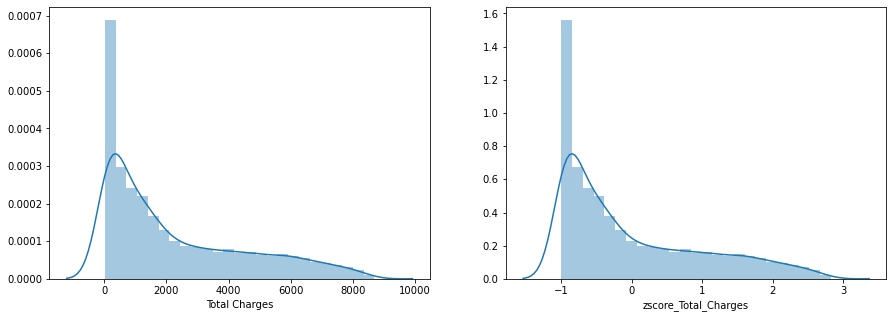

In [16]:
# Compare original to z-score distribution
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplot(1, 2, 1) 
sns.distplot(df_clean['Total Charges'])
plt.subplot(1, 2, 2) 
sns.distplot(df_clean['zscore_Total_Charges']);

- This change did not affect the distribution, therefore the z-score column will be dropped since it is less useful.

In [17]:
# Drop z-score column and ensure the change took place
df_clean.drop('zscore_Total_Charges', axis='columns', inplace=True)
df_clean.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

##### - Change identified null and zero values to the column mean

In [18]:
# Fill in null values with mean of column
df_clean['Total Charges'].fillna(value = df_clean['Total Charges'].mean(), inplace = True) # (ref 6) 

# Change zero values in the population column to null, then fill with the mean population
df_clean['Tenure Months']=df_clean['Tenure Months'].replace(0,df_clean['Tenure Months'].mean()) # (ref 7)
df_clean['Churn Value']=df_clean['Churn Value'].replace(0,df_clean['Churn Value'].mean())

In [19]:
# Verify that there are no remaining null values in transformed columns
df_clean.isnull().sum() 

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [20]:
# Verify that there are no zero values in the population column
df_clean.isin([0]).sum() 

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

##### -  Save Cleaned Data

In [21]:
# Save cleaned dataframe to CSV 
df_clean.to_csv('churn_clean_data.csv', index = False, encoding = 'utf-8')

#### Principle Component Analysis

In [22]:
# Create dataframe of numeric variables that could be considered items of interest for PCA
df_new = df_clean[['Count', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
                   'Churn Score', 'CLTV']]
df_new.head()

,Count,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,33.964131,-118.272783,2.0,53.85,108.150002,1.0,86,3239
1,1,34.059281,-118.307420,2.0,70.70,151.649994,1.0,67,2701
2,1,34.048013,-118.293953,8.0,99.65,820.500000,1.0,86,5372
3,1,34.062125,-118.315709,28.0,104.80,3046.050049,1.0,84,5003
4,1,34.039224,-118.266293,49.0,103.70,5036.299805,1.0,89,5340


In [23]:
# Normalize the dataframe
df_new_normalized = (df_new - df_new.mean()) / df_new.std()

In [24]:
# Import PCA application from Scikit Learn and designate the number of components
from sklearn.decomposition import PCA
pca = PCA(n_components = df_new.shape[1])

In [25]:
# Remove any infinite values and fill all null values with mean to avoid errors (ref 8)
df_new_normalized.replace([np.inf, -np.inf], np.nan, inplace=True)
df_new_normalized.fillna(0, inplace=True)

pca.fit(df_new_normalized)
df_pca = pd.DataFrame(pca.transform(df_new_normalized),
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

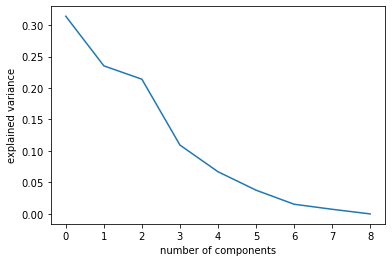

In [26]:
# Display scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [27]:
# Output loading for components
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'], index=df_new.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Count,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.0
Latitude,-0.014863,0.697129,0.116814,0.009800,0.013632,0.000162,0.707000,-0.003623,0.0
Longitude,0.014651,-0.697220,-0.116503,-0.008029,0.002330,-0.005761,0.707085,-0.004930,0.0
Tenure Months,0.558646,0.012788,0.030643,-0.073578,-0.568926,-0.246973,0.008909,0.544652,0.0
Monthly Charges,0.296416,-0.089154,0.505039,0.417171,0.535420,0.209311,-0.003509,0.380257,0.0
Total Charges,0.570477,-0.030753,0.255476,0.166767,-0.145747,-0.040378,-0.003212,-0.746758,0.0
Churn Value,-0.309742,-0.097634,0.571863,-0.132489,0.031576,-0.740182,-0.003497,-0.032674,0.0
Churn Score,-0.258037,-0.096209,0.567964,-0.247414,-0.445495,0.584671,0.007491,0.001195,0.0
CLTV,0.334138,0.006991,0.043592,-0.844876,0.410793,0.061801,-0.003307,-0.002296,0.0


- It is difficult to determine the number of primary components based on the scree plot, but it may be the first 3 based on the small bend in the line at PC3. 
- Some of the most influential variables based on the loadings values above 0.3 are: (PC1- Tenure Months, Total Charges, and CLTV), (PC2- Latitude), (PC3- Monthly Charges, Churn Value, and Churn Score)

#### References

Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. John Wiley & Sons. ISBN: 978-1-119-52684-1

#### Helpful Sites Used in Coding Project

1. https://stackoverflow.com/questions/51181129/why-the-series-give-me-zscore-of-nan-when-series-data-are-not-constant
2. https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots
3. https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7/modules/bc709f85-0ebb-45b8-907b-065adc25cbce/lessons/b86503df-e416-4f0e-9e2d-a7a3c08d0bc3/concepts/83335e78-7d71-423b-84a9-f47cdf64c0f9
4. https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot
5. https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
6. https://thispointer.com/pandas-replace-nan-with-mean-or-average-in-dataframe-using-fillna/
7. https://stackoverflow.com/questions/37506488/python-pandas-dataframe-replace-0-with-median-value
8. https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for